<a href="https://colab.research.google.com/github/pranavgupta001/Facial_Recognition/blob/master/Facial_Recognition_using_fast_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To connect google colab with google drive


In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
pwd

'/content/drive/My Drive/faces'

In [70]:
cd '/content/drive/My Drive/faces'

/content/drive/My Drive/faces


In [0]:
from fastai import*
from fastai.vision import *
import os

I am using the **CMU Face Images dataset** for the face recognition task. My aim is to predict the true identities of the people irrespective of whether they are **wearing glasses, looking up, right, left, down etc.**

In [73]:
path.ls()

[PosixPath('saavik'),
 PosixPath('mitchell'),
 PosixPath('steffi'),
 PosixPath('night'),
 PosixPath('megak'),
 PosixPath('phoebe'),
 PosixPath('tammo'),
 PosixPath('kk49'),
 PosixPath('sz24'),
 PosixPath('kawamura'),
 PosixPath('cheyer'),
 PosixPath('choon'),
 PosixPath('bpm'),
 PosixPath('at33'),
 PosixPath('danieln'),
 PosixPath('glickman'),
 PosixPath('boland'),
 PosixPath('ch4f'),
 PosixPath('an2i'),
 PosixPath('karyadi')]

In [94]:
fnames = get_image_files(path/'an2i')
fnames[:8]

[PosixPath('an2i/an2i_left_angry_open.png'),
 PosixPath('an2i/an2i_left_angry_sunglasses.png'),
 PosixPath('an2i/an2i_left_happy_sunglasses.png'),
 PosixPath('an2i/an2i_left_happy_open.png'),
 PosixPath('an2i/an2i_left_neutral_open.png'),
 PosixPath('an2i/an2i_left_sad_open.png'),
 PosixPath('an2i/an2i_left_sad_sunglasses.png'),
 PosixPath('an2i/an2i_left_neutral_sunglasses.png')]

In [76]:
imagelistRGB = ImageList.from_folder(path/'an2i')
imagelistRGB

ImageList (32 items)
Image (3, 120, 128),Image (3, 120, 128),Image (3, 120, 128),Image (3, 120, 128),Image (3, 120, 128)
Path: an2i

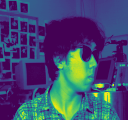

In [77]:
imagelistRGB.open(imagelistRGB.items[7])

In [0]:
data = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.2,
                ds_tfms = get_transforms(), size = 224).normalize(imagenet_stats)

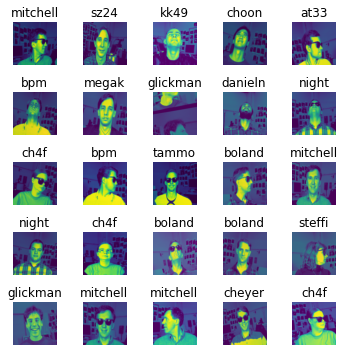

In [79]:
data.show_batch(row=3,figsize=(5,5))

In [80]:
data.classes 

['an2i',
 'at33',
 'boland',
 'bpm',
 'ch4f',
 'cheyer',
 'choon',
 'danieln',
 'glickman',
 'karyadi',
 'kawamura',
 'kk49',
 'megak',
 'mitchell',
 'night',
 'phoebe',
 'saavik',
 'steffi',
 'sz24',
 'tammo']

In [81]:
learner = cnn_learner(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [84]:
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.889276,2.147875,0.653543,03:06
1,2.270917,0.162128,0.047244,02:37
2,1.476726,0.026457,0.000000,02:39
3,1.075372,0.018947,0.000000,02:36


In [0]:
learner.save('stage-1')

In [87]:
interp = ClassificationInterpretation.from_learner(learner)
preds,y,losses = learn.get_preds(with_loss=True)  

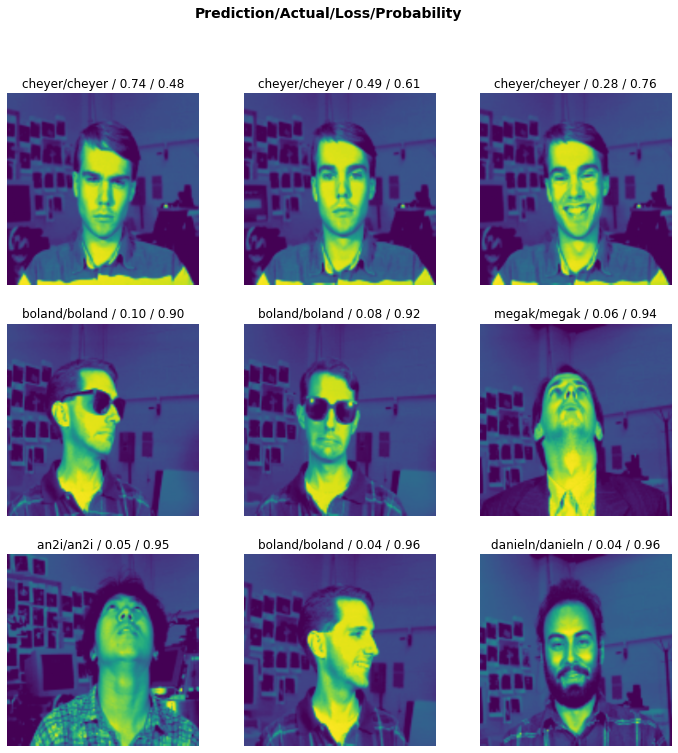

In [88]:
interp.plot_top_losses(9)

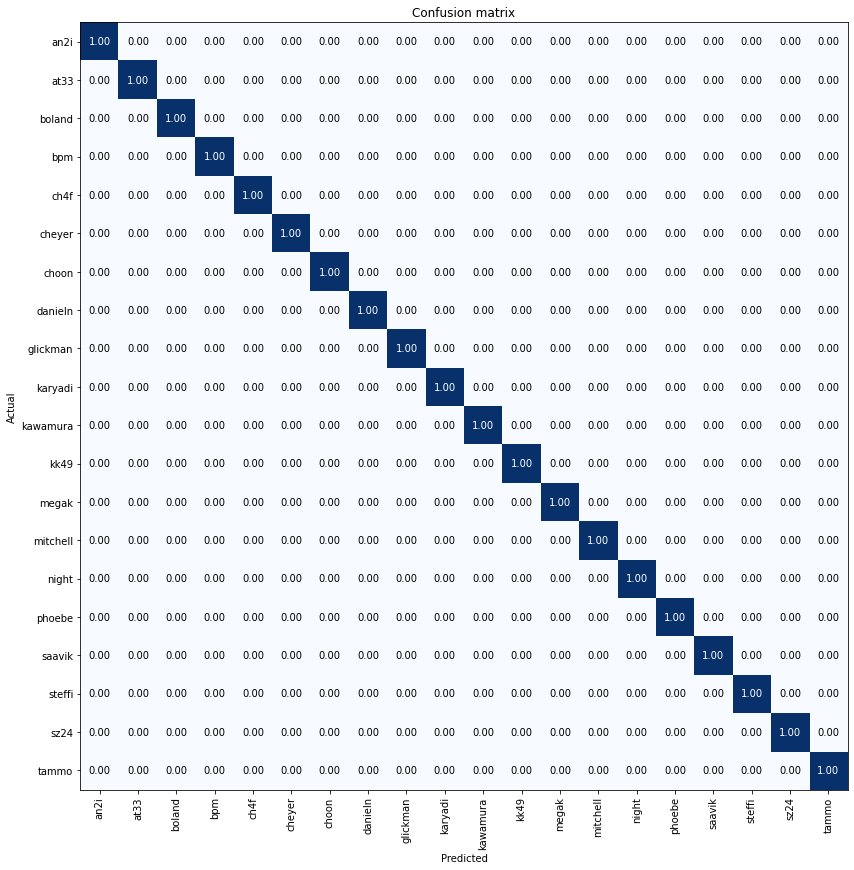

In [93]:
interp.plot_confusion_matrix(normalize=True,figsize=(12,12))

We are able to achieve 100% accuracy.